# Exploratory Data Analysis
Author: Alex Searle

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
sns.set_theme(style="darkgrid")

In [2]:
# Read in the data from preprocessing and feature engineering
result_df = pd.read_csv('Data/Modeling_v1.csv')
result_df.drop(columns=['Unnamed: 0'], inplace=True)
result_df.top_3 = result_df.top_3.astype('int')

In [3]:
# Checking What columns we have
result_df.columns

Index(['driverId', 'grid', 'positionOrder', 'points', 'statusId', 'year',
       'round', 'top3_driver_season_percentage', 'top_3',
       'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
       'round_max_last_szn', 'top3_driver_season_percentage_lag',
       'driver_avg_finish_pos_season_lag', 'Constructor_Top3_Percent_lag',
       'round_lag'],
      dtype='object')

In [4]:
# getting info about the numerical data in the data set
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
driverId,18114.0,242.809540,270.219288,1.0,37.000000,139.000000,327.000000,855.000000
grid,18114.0,9.998399,6.565381,0.0,4.000000,9.000000,15.000000,32.000000
positionOrder,18114.0,11.575466,7.410793,1.0,5.000000,11.000000,17.000000,39.000000
points,18114.0,2.517707,4.802774,0.0,0.000000,0.000000,3.000000,50.000000
statusId,18114.0,14.283538,23.374495,1.0,1.000000,6.000000,12.000000,141.000000
round,18114.0,8.530694,5.006259,1.0,4.000000,8.000000,12.000000,22.000000
top3_driver_season_percentage,18114.0,14.891518,24.794310,0.0,0.000000,0.000000,22.222222,200.000000
top_3,18114.0,0.165121,0.371300,0.0,0.000000,0.000000,0.000000,1.000000
driver_avg_finish_pos_season,18114.0,10.965033,4.596934,0.0,8.968629,11.056701,13.416667,35.100000
Constructor_Top3_Percent,18114.0,15.916942,23.313033,0.0,0.000000,2.777778,25.000000,300.000000


In [5]:
print(f'class 1: {result_df[result_df.top_3 == True].top_3.count() / result_df.shape[0]:.2%}')

class 1: 16.51%


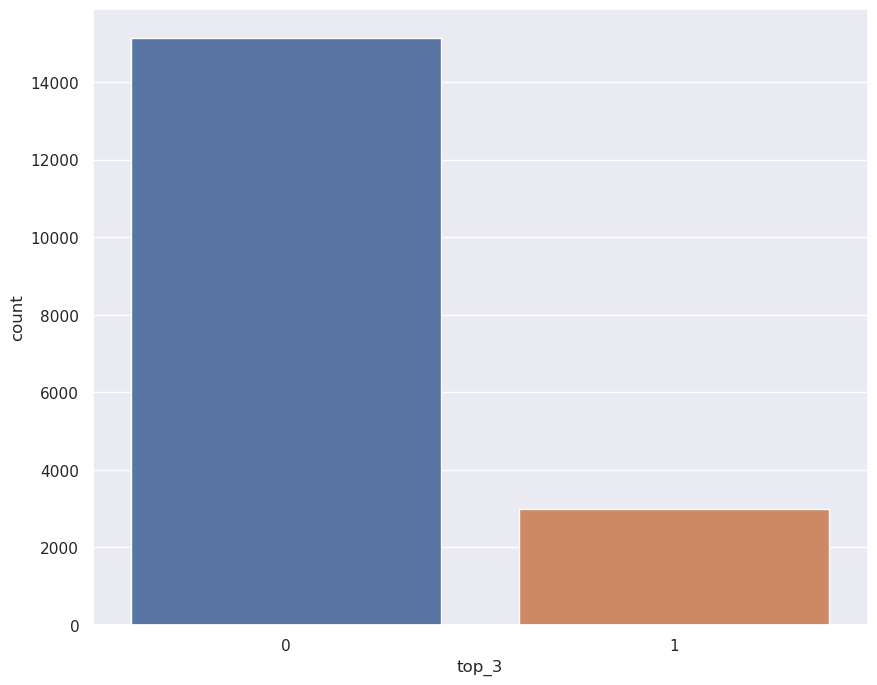

In [6]:
# Distribution of the target which is positionOrder
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(data=result_df, x='top_3', ax=ax)
plt.savefig('Images/TargetDistribution.png')
plt.show()

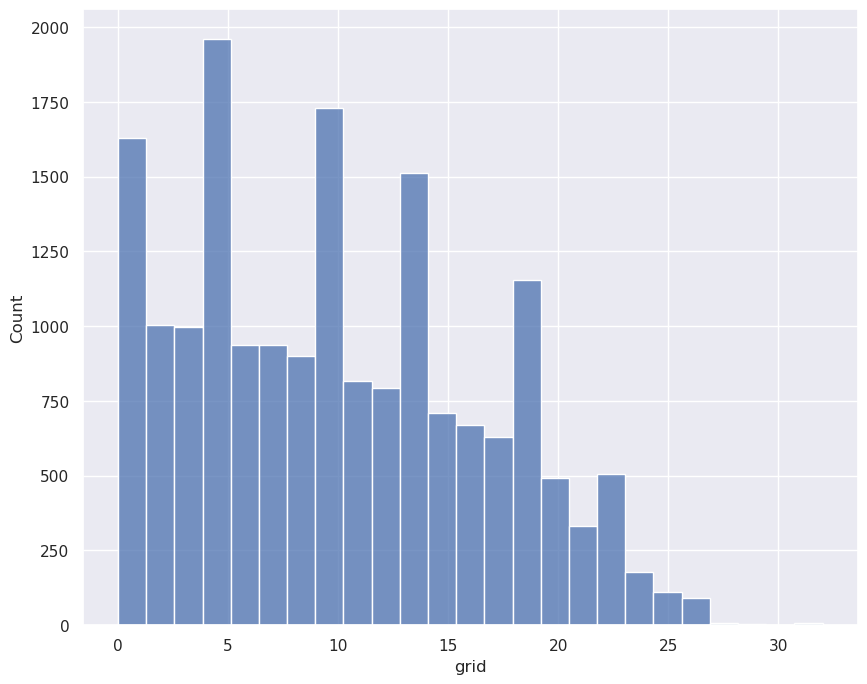

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=result_df, x='grid', bins=25, ax=ax)
plt.savefig(f'Images/GridDistribution.png')
plt.show()

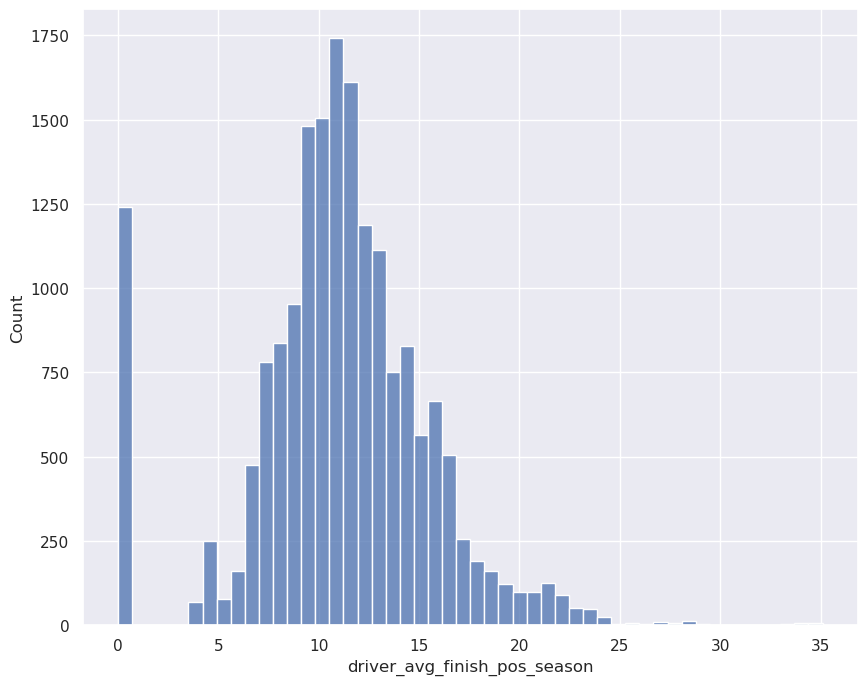

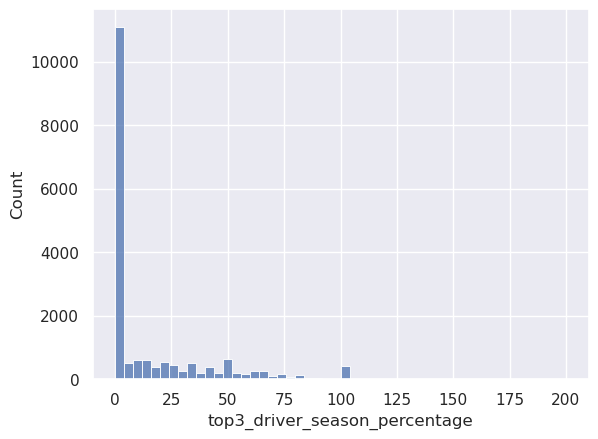

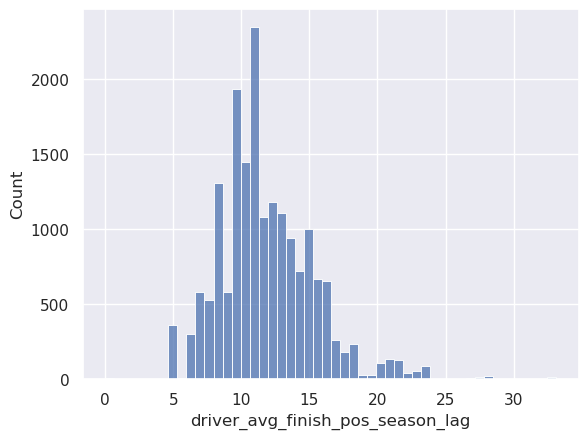

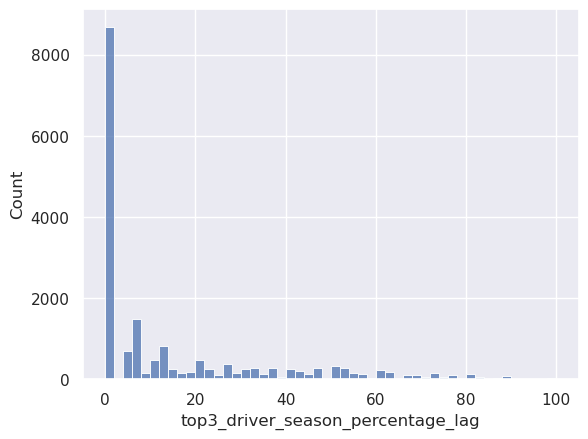

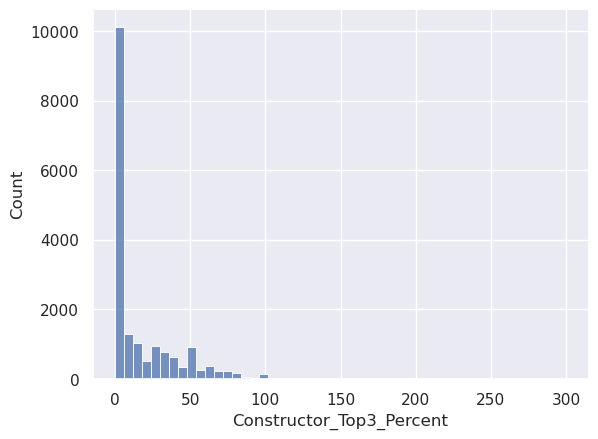

In [8]:
# Getting Distribution Plots
features = ['driver_avg_finish_pos_season', 'top3_driver_season_percentage', 'driver_avg_finish_pos_season_lag', 'top3_driver_season_percentage_lag', 'Constructor_Top3_Percent']
fig, ax = plt.subplots(figsize=(10,8))
for feature in features:
    sns.histplot(data=result_df, x=feature, bins=50)
    plt.savefig(f'Images/{feature}Distribution.png')
    plt.show()

### Getting general overview of relationships

/home/alexsearle/anaconda3/envs/testing/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


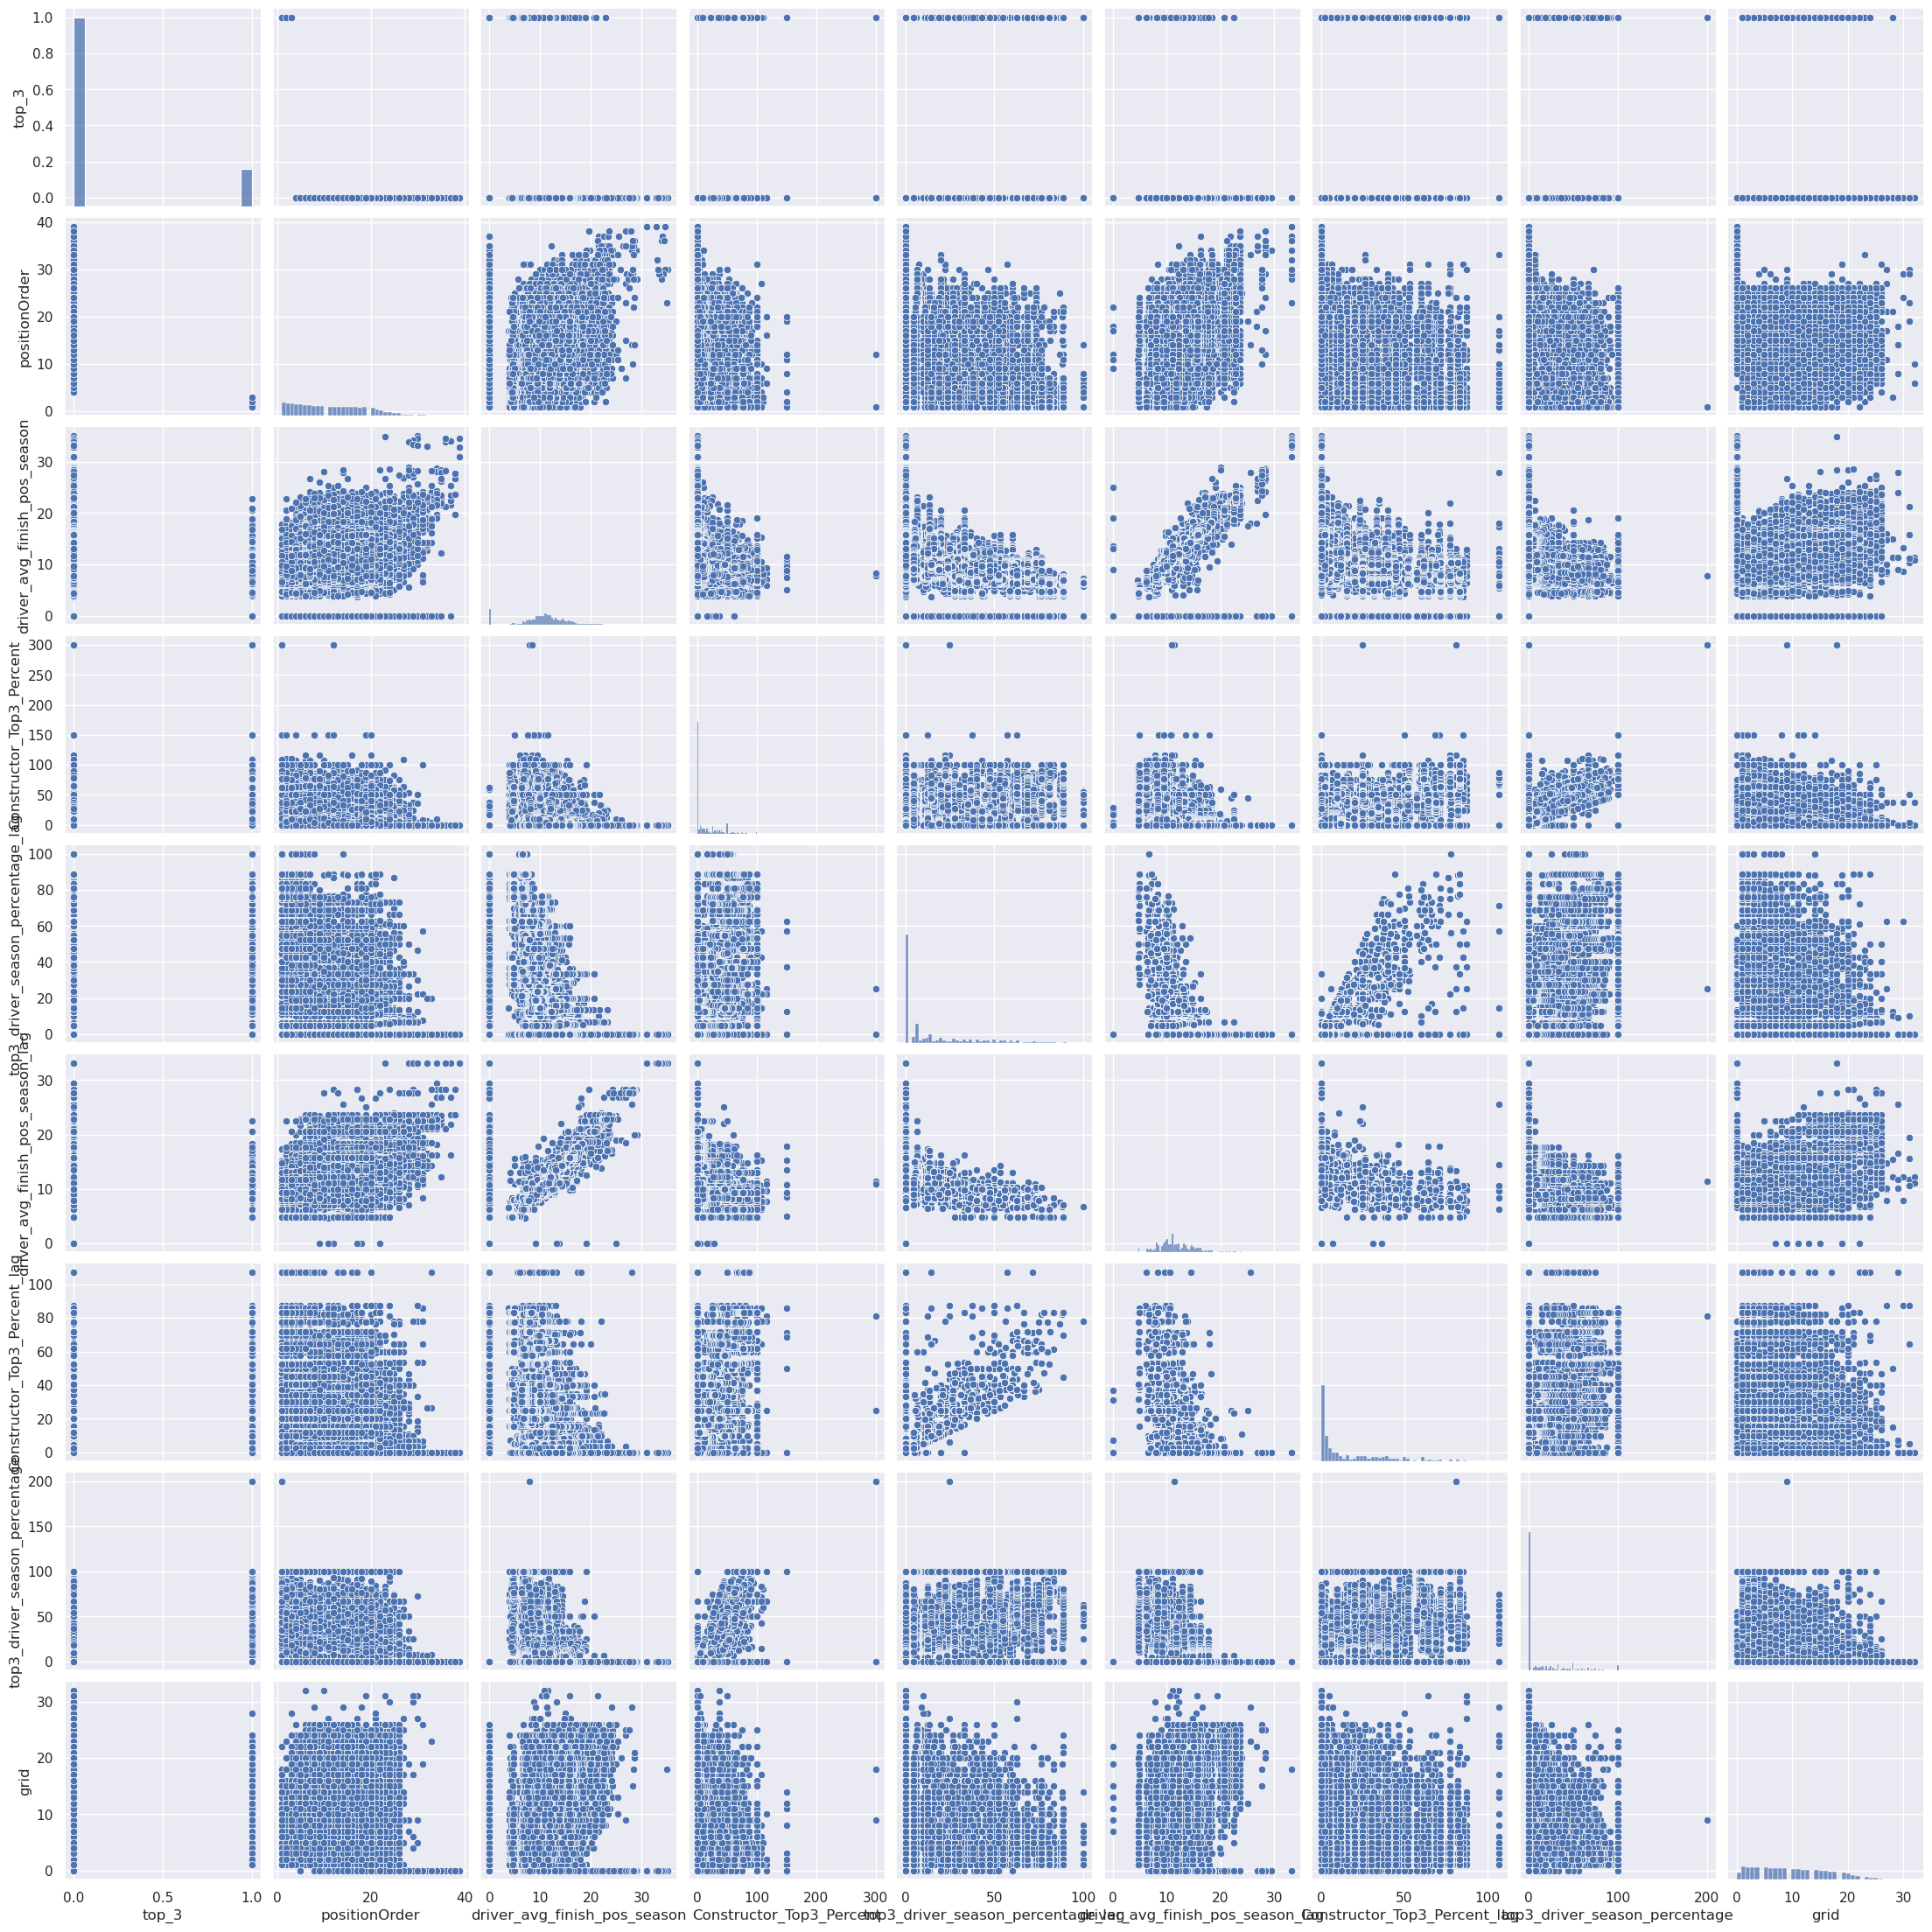

In [9]:
sns.pairplot(result_df[['top_3','positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                        'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                        'Constructor_Top3_Percent_lag',
                        'top3_driver_season_percentage', 'grid']])

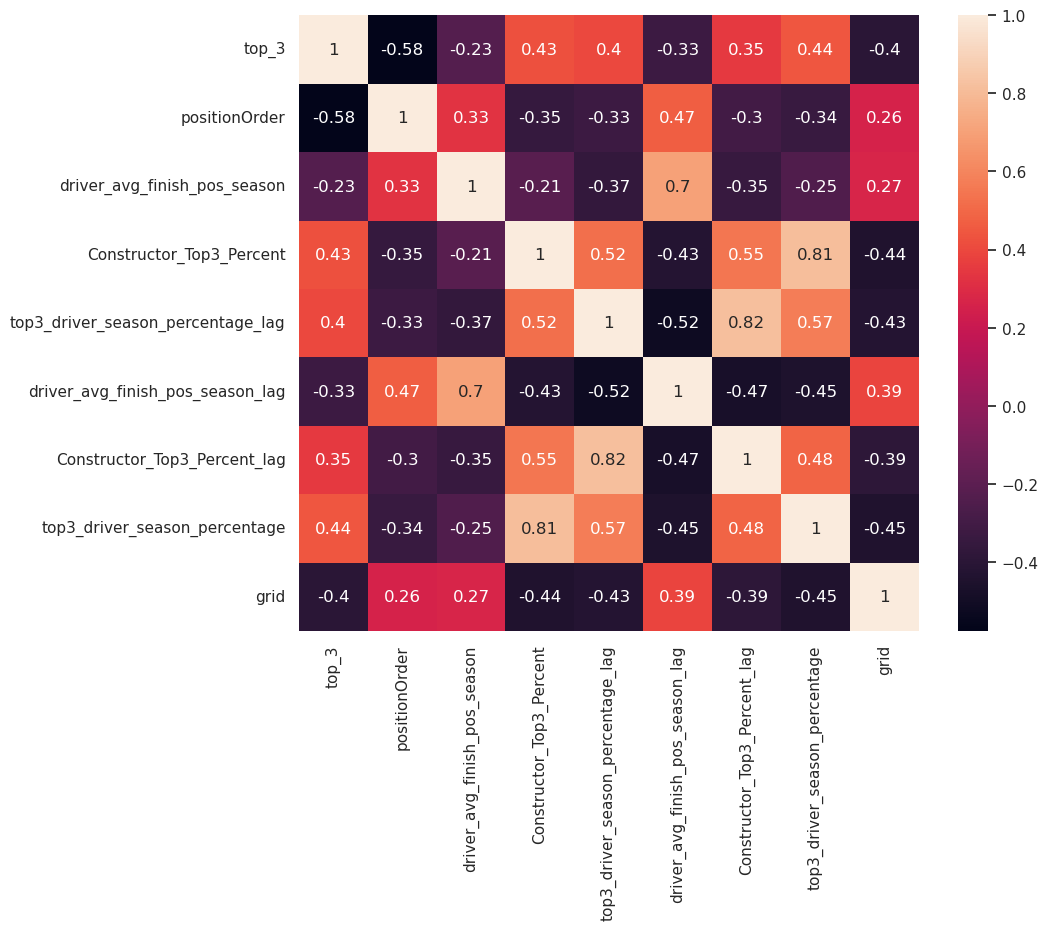

In [10]:
# making a correlation map
corr = result_df[['top_3', 'positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                  'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                  'Constructor_Top3_Percent_lag',
                  'top3_driver_season_percentage', 'grid']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax)
plt.savefig('Images/CorrelationMap.png', bbox_inches="tight")
plt.show()

### Taking closer look at varaibles that are closely correlated with positionOrder

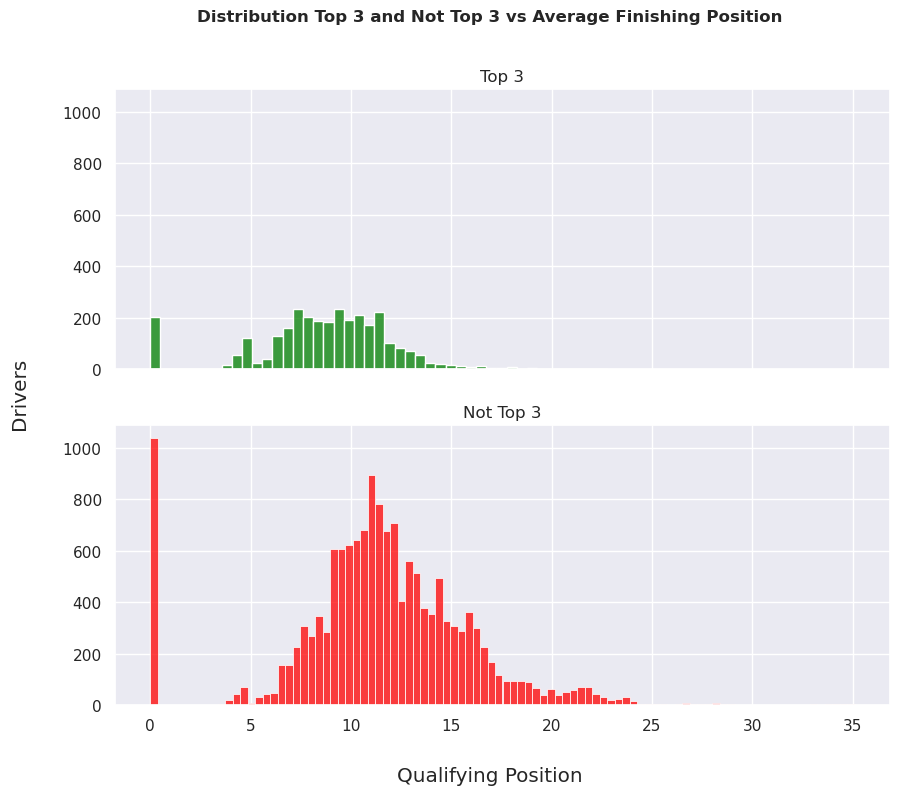

In [11]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season', ax=ax[0], color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season', ax=ax[1], color='red')
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Average Finishing Position', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/PositionOrderVsdriver_avg_finish_pos_season.png')
plt.show()

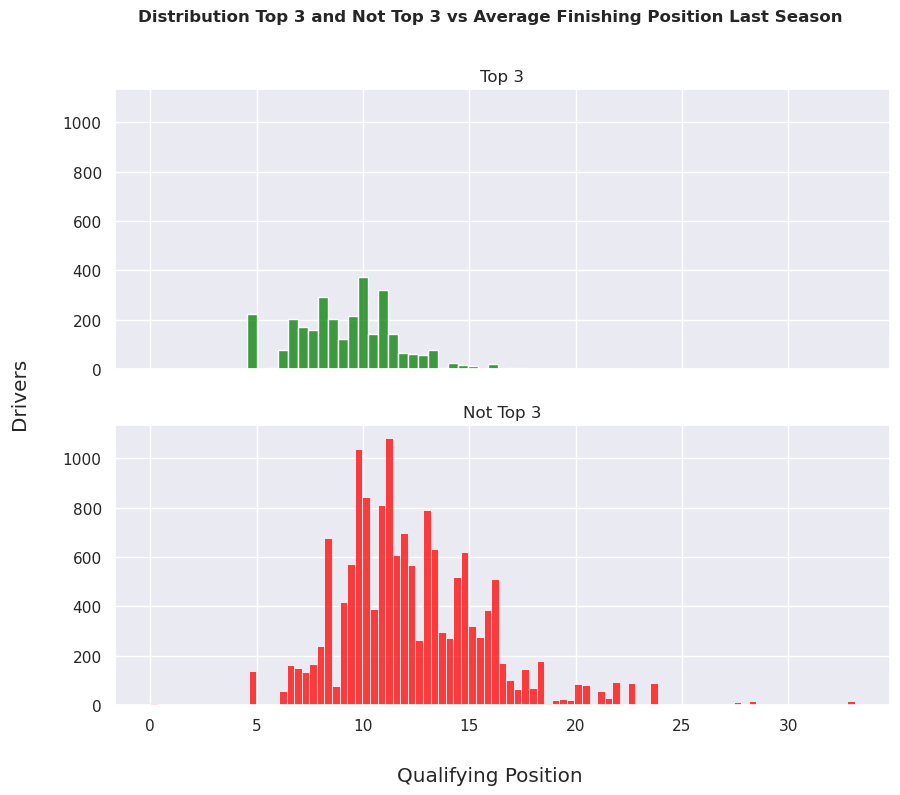

In [12]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season_lag', ax=ax[0], color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season_lag', ax=ax[1], color='red')
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Average Finishing Position Last Season', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/driver_avg_pos_season_lag.png')
plt.show()

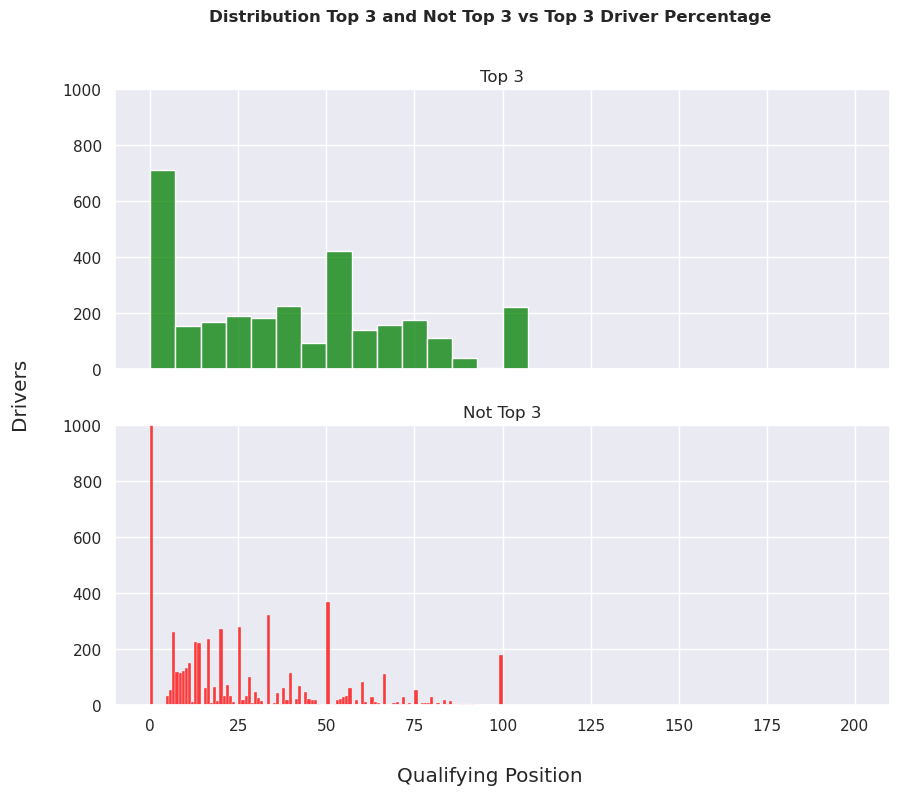

In [13]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage', ax=ax[0], color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage', ax=ax[1], color='red')
ax[1].set_ylim(top=1000)
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Top 3 Driver Percentage', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/top3_driver_season_percentage.png')
plt.show()

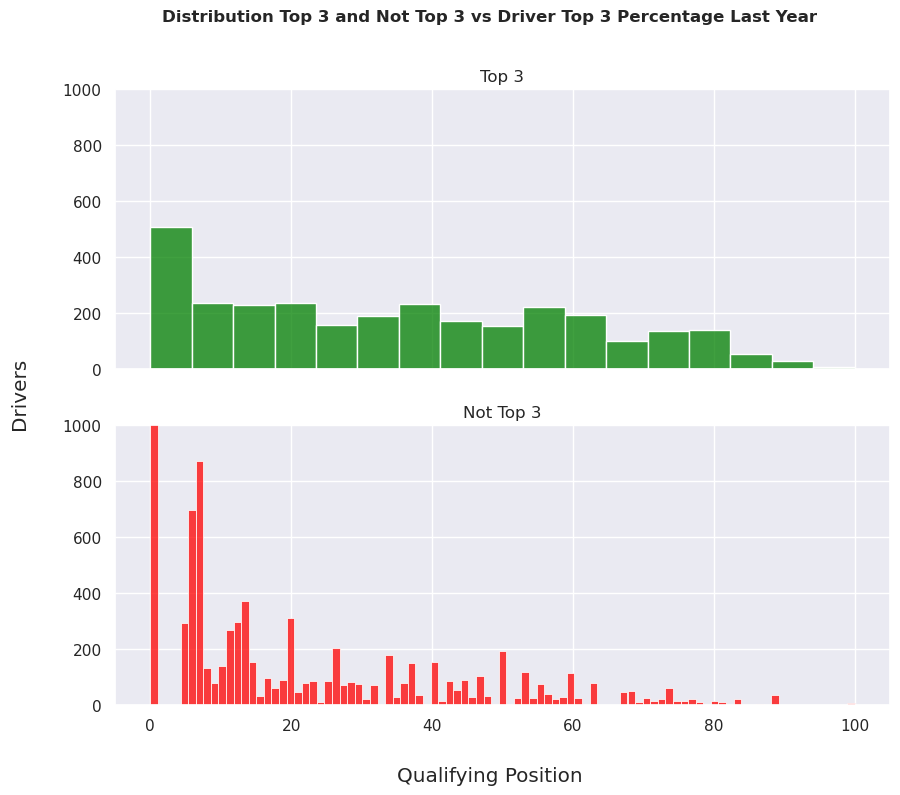

In [14]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage_lag', ax=ax[0], color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage_lag', ax=ax[1], color='red')
ax[1].set_ylim(top=1000)
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Driver Top 3 Percentage Last Year', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/top3_driver_season_percentage_lag.png')
plt.show()

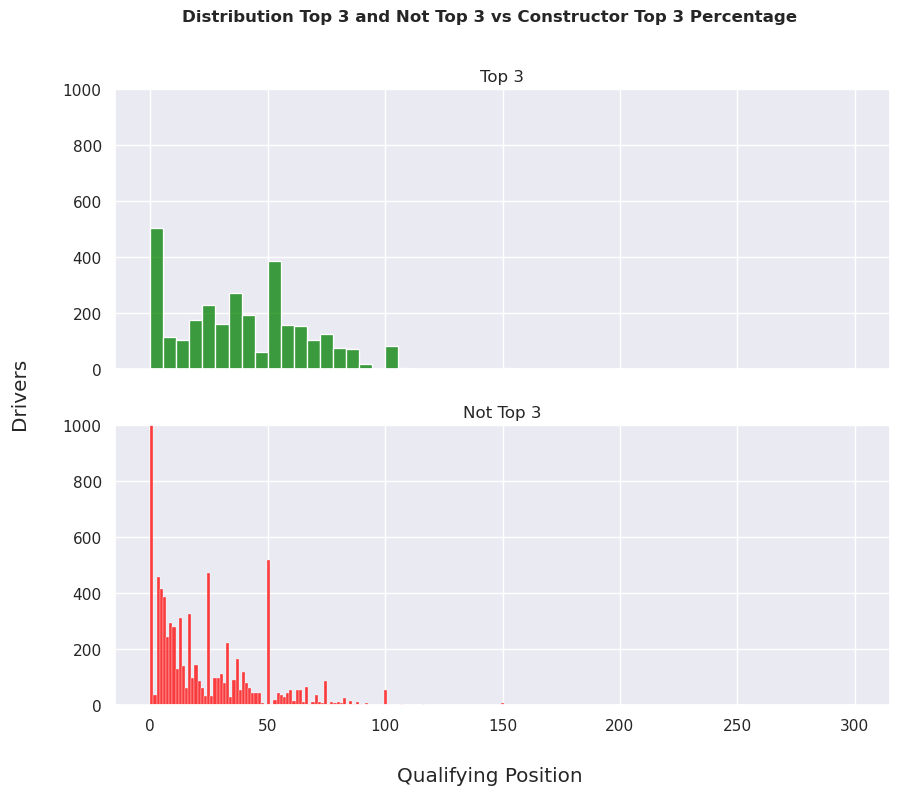

In [15]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='Constructor_Top3_Percent', ax=ax[0], color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='Constructor_Top3_Percent', ax=ax[1], color='red')
ax[1].set_ylim(top=1000)
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Constructor Top 3 Percentage', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/Constructor_Top_3Percent.png')
plt.show()

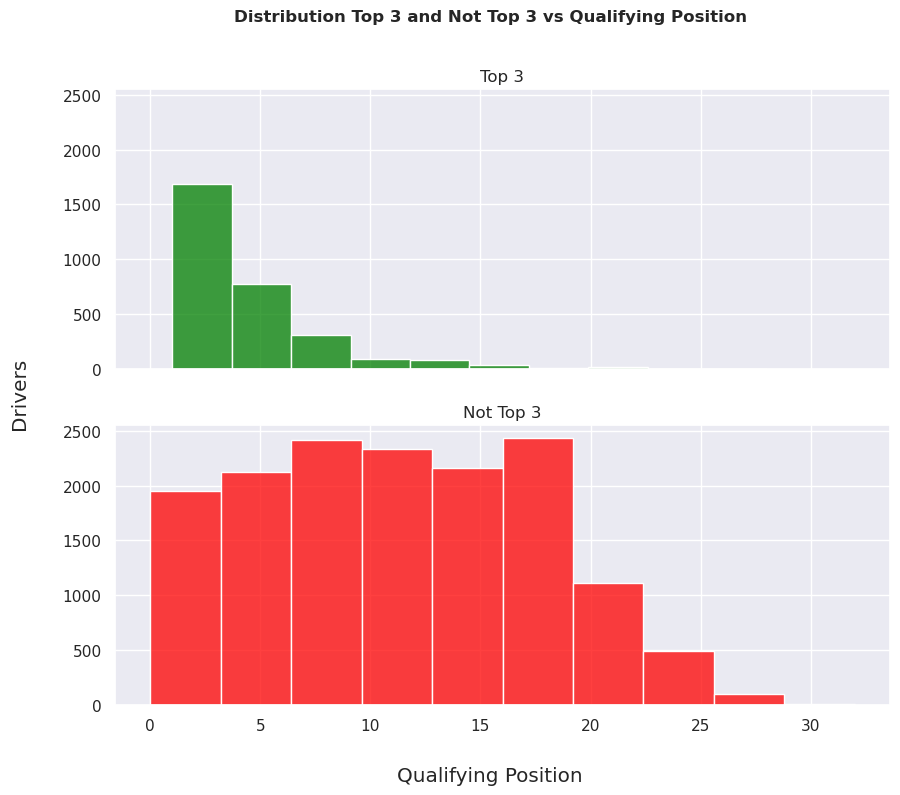

In [16]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='grid', ax=ax[0], bins=10, color='green')
sns.histplot(result_df[result_df.top_3 == 0], x='grid', ax=ax[1], bins=10, color='red')
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
ax[1].set_ylabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
plt.suptitle('Distribution Top 3 and Not Top 3 vs Qualifying Position', fontsize=12, fontweight='bold')
fig.supylabel('Drivers')
fig.supxlabel('Qualifying Position')
plt.savefig('Images/grid.png')
plt.show()

## Modeling

In [26]:
# starting our modeling with a Decision Tree
# Splitting our model based on years to avoid data leakage
features = ['driver_avg_finish_pos_season', 'top3_driver_season_percentage', 'driver_avg_finish_pos_season_lag', 'top3_driver_season_percentage_lag', 'Constructor_Top3_Percent', 'grid']
result_df.set_index(result_df['year'], inplace=True)
train = result_df['1983-01-01':'2010-01-01']
test = result_df['2010-01-01':]
train.reset_index(inplace=True, drop=True)
X_train = train[features]
X_test = test[features]
y_train = train['top_3']
y_test = test['top_3']
tss = TimeSeriesSplit(n_splits=5)
train_idx = tss.split(X_train, y_train)
params = {
    'criterion': ['entropy', 'log_loss', 'gini'],
    'max_depth': list(range(3,15)),
    'min_samples_split': list(range(20, 40)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
DecisionTreeGridSearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='f1', cv=tss.split(X_train, y_train), verbose=True)
DecisionTreeGridSearch.fit(X_train, y_train)
print(f'Best score: {DecisionTreeGridSearch.best_score_}')
print(f'Best params: {DecisionTreeGridSearch.best_params_}')
best_decision_tree = DecisionTreeGridSearch.best_estimator_
test_prediction = best_decision_tree.predict(X_test)
test_score = roc_auc_score(y_test, test_prediction)
train_pred = best_decision_tree.predict(X_train)
print(f'Train roc_auc: {roc_auc_score(y_train, train_pred)}')
print(f'Test roc_auc score: {test_score}')
print(f'Train Accuracy: {best_decision_tree.score(X_train, y_train)}')
print(f'Test Accuracy: {best_decision_tree.score(X_test, y_test)}')
print(f'Train F1: {f1_score(y_train, train_pred)}')
print(f'Test F1: {f1_score(y_test, test_prediction)}')

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Best score: 0.5572133838311318
Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}
Train roc_auc: 0.7433318431065822
Test roc_auc score: 0.8037744359465672
Train Accuracy: 0.8668950041336956
Test Accuracy: 0.8848295834261528
Train F1: 0.5660377358490566
Test F1: 0.6754551161330823


In [18]:
# Dummy Classifier
dummy = DummyClassifier(random_state=42)
dummy.fit(X_train, y_train)
train_pred = dummy.predict(X_train)
test_pred = dummy.predict(X_test)
print(f'Train accuracy: {dummy.score(X_train, y_train)}')
print(f'Test accuracy: {dummy.score(X_test, y_test)}')
print(f'Train F1: {f1_score(y_train, train_pred)}')
print(f'Test F1: {f1_score(y_test, test_pred)}')

Train accuracy: 0.8463446321010983
Test accuracy: 0.823345956783248
Train F1: 0.0
Test F1: 0.0


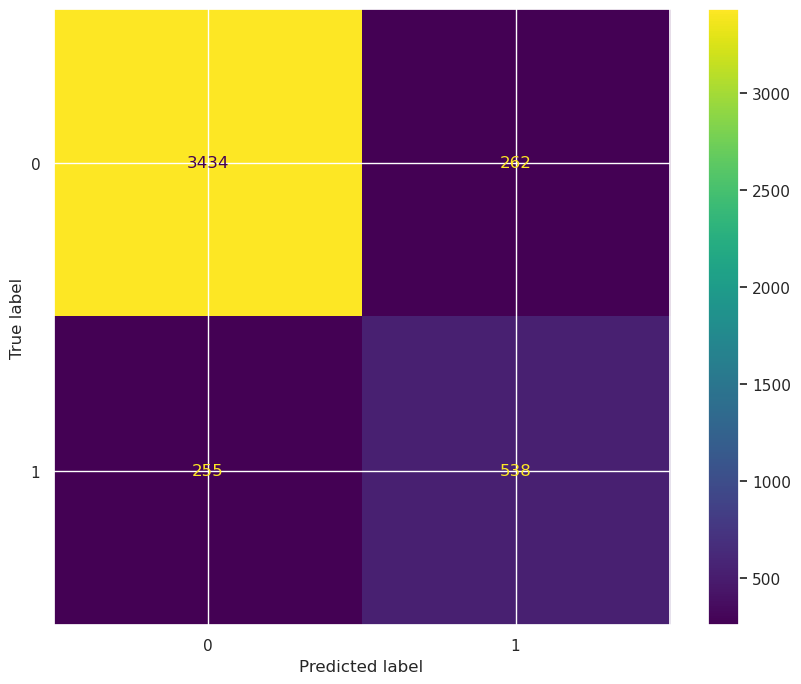

In [19]:
cm = confusion_matrix(y_test, test_prediction)
fig, ax = plt.subplots(figsize=(10,8))
display = ConfusionMatrixDisplay(cm, display_labels=best_decision_tree.classes_)
display.plot(ax=ax)

In [28]:
# Now going to use a Random Forest
param_grid={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [75, 85, 90, 100],
    'max_depth': list(range(5,15)),
    'min_samples_split': list(range(20,30)),
    'min_impurity_decrease':[.0001, .001]
}
randomforestgridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, n_jobs=-1, scoring='f1', cv=tss.split(X_train, y_train), verbose=True)
randomforestgridsearch.fit(X_train, y_train)
print(f'Best score: {randomforestgridsearch.best_score_}')
print(f'Best params: {randomforestgridsearch.best_params_}')
best_forest = randomforestgridsearch.best_estimator_
pred = best_forest.predict(X_test)
print(f'Test score: {roc_auc_score(y_test, pred)}')
print(f'Train Accuracy: {best_forest.score(X_train, y_train)}')
print(f'Test Accuracy: {best_forest.score(X_test, y_test)}')
train_pred = best_forest.predict(X_train)
print(f'Train F1: {f1_score(y_train, train_pred)}')
print(f'Test F1: {f1_score(y_test, pred)}')

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best score: 0.4836343961350478
Best params: {'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0001, 'min_samples_split': 22, 'n_estimators': 100}
Test score: 0.7905866333120432
Train Accuracy: 0.8840203141608598
Test Accuracy: 0.8883938516373358
Train F1: 0.5487132352941176
Test F1: 0.6693069306930692


In [21]:
# SVC
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
params= {
    'C': [.1, .2, .3, .5, .8, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
}
svc_grid_search = GridSearchCV(SVC(cache_size=2000, random_state=42), param_grid=params, cv=tss.split(X_train_std, y_train), scoring='f1', n_jobs=-1, verbose=True)
svc_grid_search.fit(X_train_std, y_train)
print(f'Best score: {svc_grid_search.best_score_}')
print(f'Best params: {svc_grid_search.best_params_}')
best_svc = svc_grid_search.best_estimator_
pred = best_svc.predict(X_test_std)
print(f'Test score: {f1_score(y_test, pred)}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best score: 0.4448803709324311
Best params: {'C': 1, 'degree': 1, 'kernel': 'rbf'}
Test score: 0.6409574468085106


In [22]:
# Logistic Regression
params = {
    'C': [.0000001, .01, .001, .005, .000001],
    'solver': ['liblinear', 'lbfgs', 'newton-cholesky'],
}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=200), param_grid=params, n_jobs=-1, scoring='f1', cv=tss.split(X_train, y_train), verbose=True)
lr_grid_search.fit(X_train_std, y_train)
print(f'Best score: {lr_grid_search.best_score_}')
print(f'Best params: {lr_grid_search.best_params_}')
best_lr = lr_grid_search.best_estimator_
pred = best_lr.predict(X_test_std)
print(f'Test score: {f1_score(y_test, pred)}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best score: 0.5707989072131469
Best params: {'C': 1e-06, 'solver': 'liblinear'}
Test score: 0.6333180357962368


## Now modeling to predict finishing position

In [23]:
# Decision Tree
# Switching Target to finishing position (positionOrder)
y_train = train['positionOrder']
y_test = test['positionOrder']
params = {
    'criterion': ['entropy', 'log_loss', 'gini'],
    'max_depth': list(range(3,15)),
    'min_samples_split': list(range(30, 60)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
DecisionTreeGridSearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='f1_micro', cv=tss.split(X_train, y_train), verbose=True)
DecisionTreeGridSearch.fit(X_train, y_train)
print(f'Best score: {DecisionTreeGridSearch.best_score_}')
print(f'Best params: {DecisionTreeGridSearch.best_params_}')
best_decision_tree = DecisionTreeGridSearch.best_estimator_
test_prediction = best_decision_tree.predict(X_test)
test_score = f1_score(y_test, test_prediction, average='micro')
print(f'Test score: {test_score}')
print(f'Train Accuracy: {best_forest.score(X_train, y_train)}')
print(f'Test Accuracy: {best_forest.score(X_test, y_test)}')

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
Best score: 0.10843373493975905
Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 32}
Test score: 0.1305413232345734
Train Accuracy: 0.03460493681351128
Test Accuracy: 0.050122521719759415


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (39).

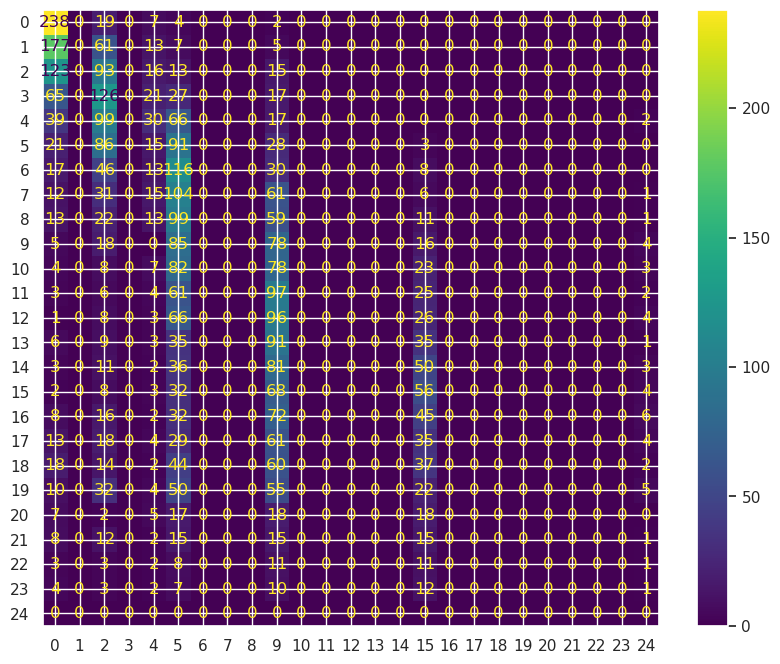

In [24]:
cm = confusion_matrix(y_test, test_prediction)
fig, ax = plt.subplots(figsize=(10,8))
display = ConfusionMatrixDisplay(cm, display_labels=best_decision_tree.classes_)
display.plot(ax=ax)